https://bcimoney.xyz/

http://blog.naver.com/PostView.nhn?blogId=htblog&logNo=221510551432&parentCategoryNo=&categoryNo=99&viewDate=&isShowPopularPosts=true&from=search

https://www.pyimagesearch.com/2017/07/17/credit-card-ocr-with-opencv-and-python/

In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def load(image_file):
    # 해당경로의 파일을 읽어서 float 타입으로 변환합니다.
    image = tf.io.read_file(image_file)
    image = tf.image.decode_jpeg(image)
    image = tf.cast(image, tf.float32)
    image = tf.image.resize_with_pad(image,228,143)

    return image

In [3]:
image_1 = load("./numbers/1.jpg")
image_2 = load("./numbers/2.jpg")
image_3 = load("./numbers/3.jpg")
image_4 = load("./numbers/4.jpg")
image_5 = load("./numbers/5.jpg")
image_6 = load("./numbers/6.jpg")
image_7 = load("./numbers/7.jpg")
image_8 = load("./numbers/8.jpg")
image_9 = load("./numbers/9.jpg")

In [4]:
print(image_1.shape)
print(image_2.shape)
print(image_3.shape)
print(image_4.shape)
print(image_5.shape)
print(image_6.shape)
print(image_7.shape)
print(image_8.shape)
print(image_9.shape)

(228, 143, 3)
(228, 143, 3)
(228, 143, 3)
(228, 143, 3)
(228, 143, 3)
(228, 143, 3)
(228, 143, 3)
(228, 143, 3)
(228, 143, 3)


In [5]:
image_1_extension = np.expand_dims(image_1,axis=0)
image_2_extension = np.expand_dims(image_2,axis=0)
image_3_extension = np.expand_dims(image_3,axis=0)
image_4_extension = np.expand_dims(image_4,axis=0)
image_5_extension = np.expand_dims(image_5,axis=0)
image_6_extension = np.expand_dims(image_6,axis=0)
image_7_extension = np.expand_dims(image_7,axis=0)
image_8_extension = np.expand_dims(image_8,axis=0)
image_9_extension = np.expand_dims(image_9,axis=0)

In [6]:
image_array = np.concatenate((image_1_extension,image_2_extension),axis=0)
image_array = np.concatenate((image_array,image_3_extension),axis=0)
image_array = np.concatenate((image_array,image_4_extension),axis=0)
image_array = np.concatenate((image_array,image_5_extension),axis=0)
image_array = np.concatenate((image_array,image_6_extension),axis=0)
image_array = np.concatenate((image_array,image_7_extension),axis=0)
image_array = np.concatenate((image_array,image_8_extension),axis=0)
image_array = np.concatenate((image_array,image_9_extension),axis=0)

In [7]:
image_array = tf.image.resize(image_array,(54,31))

In [8]:
image_array.shape

TensorShape([9, 54, 31, 3])

In [9]:
num_classes = 9
batch_size = 1

In [10]:
label = [i for i in range(0,9)]
label = tf.one_hot(label,num_classes)

In [11]:
label

<tf.Tensor: shape=(9, 9), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)>

In [12]:
train_dataset = tf.data.Dataset.from_tensor_slices((image_array,label))
train_dataset = train_dataset.shuffle(len(list(train_dataset))) # over or equal than dataset number
print(len(list(train_dataset)))
train_dataset = train_dataset.batch(batch_size)

print(train_dataset)

9
<BatchDataset shapes: ((None, 54, 31, 3), (None, 9)), types: (tf.float32, tf.float32)>


In [13]:
class Conv(tf.keras.Model):
    def __init__(self, num_filters, kernel_size):
        super(Conv, self).__init__()
        ## 코드 시작 ##
        self.conv = tf.keras.layers.Conv2D(filters=num_filters,kernel_size=[kernel_size, kernel_size],padding='Same')
        self.bn = tf.keras.layers.BatchNormalization()
        self.relu = tf.keras.layers.ReLU()
        self.pool = tf.keras.layers.MaxPool2D(pool_size=(2,2))
#         self.dropout = tf.keras.layers.Dropout(0.25)
        ## 코드 종료 ##

    def call(self, inputs, training=True):
        ## 코드 시작 ##
        x = self.conv(inputs)    # self.conv forward
        x = self.bn(x)    # self.bn   forward
        x = self.relu(x)    # self.relu forward
        x = self.pool(x)    # self.pool forward
#         x = self.dropout(x)
        ## 코드 종료 ##

        return x

In [14]:
class SimpleCNN(tf.keras.Model):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        ## 코드 시작 ##
        self.conv1 = Conv(32,5)
        self.conv2 = Conv(64,3)

        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units=256,activation=tf.nn.relu)
#         self.dropout = tf.keras.layers.Dropout(0.25)
        self.dense2 = tf.keras.layers.Dense(units=num_classes,activation=tf.nn.softmax)
        ## 코드 종료 ##

    def call(self, inputs, training=True):
        ## 코드 시작 ##
        x = self.conv1(inputs)    # self.conv1 forward
        x = self.conv2(x)    # self.conv2 forward
        x = self.flatten(x)    # flatten 
        x = self.dense1(x)    # self.dense1 forward
#         x = self.dropout(x)
        x = self.dense2(x)    # self.dense2 forward
        ## 코드 종료 ##

        return x

In [15]:
model = SimpleCNN()
for images, labels in train_dataset.take(1):
    print(images.shape)
    outputs = model(images, training=False)
model.summary()

(1, 54, 31, 3)
Model: "simple_cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv (Conv)                  multiple                  2560      
_________________________________________________________________
conv_1 (Conv)                multiple                  18752     
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  1491200   
_________________________________________________________________
dense_1 (Dense)              multiple                  2313      
Total params: 1,514,825
Trainable params: 1,514,633
Non-trainable params: 192
_________________________________________________________________


In [16]:
optimizer = tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer=optimizer, loss="categorical_crossentropy")

In [17]:
outputs = model.fit(train_dataset,epochs=5000,verbose=1)

Train for 9 steps
Epoch 1/5000
9/9 [==============================] - 1s 60ms/step - loss: 20.0671
Epoch 2/5000
9/9 [==============================] - 0s 5ms/step - loss: 4.1459
Epoch 3/5000
9/9 [==============================] - 0s 5ms/step - loss: 1.3242
Epoch 4/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.9306
Epoch 5/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.1069
Epoch 6/5000
9/9 [==============================] - 0s 6ms/step - loss: 0.5841
Epoch 7/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.3192
Epoch 8/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.7318
Epoch 9/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 10/5000
9/9 [==============================] - 0s 5ms/step - loss: 8.1182e-04
Epoch 11/5000
9/9 [==============================] - 0s 5ms/step - loss: 5.4703e-04
Epoch 12/5000
9/9 [==============================] - 0s 5ms/step - loss: 3.7939e-04
Epoch 13/5000
9/9

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 99/5000
9/9 [==============================] - 0s 4ms/step - loss: 0.0000e+00
Epoch 100/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 101/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 102/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 103/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 104/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 105/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 106/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 107/5000
9/9 [==============================] - 0s 4ms/step - loss: 0.0000e+00
Epoch 108/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 109/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 195/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 196/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 197/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 198/5000
9/9 [==============================] - 0s 6ms/step - loss: 0.0000e+00
Epoch 199/5000
9/9 [==============================] - 0s 7ms/step - loss: 0.0000e+00
Epoch 200/5000
9/9 [==============================] - 0s 6ms/step - loss: 0.0000e+00
Epoch 201/5000
9/9 [==============================] - 0s 6ms/step - loss: 0.0000e+00
Epoch 202/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 203/5000
9/9 [==============================] - 0s 6ms/step - loss: 0.0000e+00
Epoch 204/5000
9/9 [==============================] - 0s 6ms/step - loss: 0.0000e+00
Epoch 205/5000
9/9 [==============================] - 0s 6ms/step - loss: 0.0000

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 291/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 292/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 293/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 294/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 295/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 296/5000
9/9 [==============================] - 0s 4ms/step - loss: 0.0000e+00
Epoch 297/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 298/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 299/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 300/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 301/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 387/5000
9/9 [==============================] - 0s 6ms/step - loss: 0.0000e+00
Epoch 388/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 389/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 390/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 391/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 392/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 393/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 394/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 395/5000
9/9 [==============================] - 0s 4ms/step - loss: 0.0000e+00
Epoch 396/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 397/5000
9/9 [==============================] - ETA: 0s - loss: 0.0000e+0 

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 482/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 483/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 484/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 485/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 486/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 487/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 488/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 489/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 490/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 491/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 492/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 578/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 579/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 580/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 581/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 582/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 583/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 584/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 585/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 586/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 587/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 588/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 674/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 675/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 676/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 677/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 678/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 679/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 680/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 681/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 682/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 683/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 684/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 770/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 771/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 772/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 773/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 774/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 775/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 776/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 777/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 778/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 779/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 780/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 866/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 867/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 868/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 869/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 870/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 871/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 872/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 873/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 874/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 875/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 876/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000

9/9 [==============================] - 0s 6ms/step - loss: 0.0000e+00
Epoch 962/5000
9/9 [==============================] - 0s 6ms/step - loss: 0.0000e+00
Epoch 963/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 964/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 965/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 966/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 967/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 968/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 969/5000
9/9 [==============================] - 0s 6ms/step - loss: 0.0000e+00
Epoch 970/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 971/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 972/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1057/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1058/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1059/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1060/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1061/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1062/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1063/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1064/5000
9/9 [==============================] - 0s 4ms/step - loss: 0.0000e+00
Epoch 1065/5000
9/9 [==============================] - 0s 4ms/step - loss: 0.0000e+00
Epoch 1066/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1067/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1152/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1153/5000
9/9 [==============================] - 0s 4ms/step - loss: 0.0000e+00
Epoch 1154/5000
9/9 [==============================] - 0s 4ms/step - loss: 0.0000e+00
Epoch 1155/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1156/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1157/5000
9/9 [==============================] - 0s 4ms/step - loss: 0.0000e+00
Epoch 1158/5000
9/9 [==============================] - 0s 4ms/step - loss: 0.0000e+00
Epoch 1159/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1160/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1161/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1162/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1247/5000
9/9 [==============================] - 0s 6ms/step - loss: 0.0000e+00
Epoch 1248/5000
9/9 [==============================] - 0s 8ms/step - loss: 0.0000e+00
Epoch 1249/5000
9/9 [==============================] - 0s 7ms/step - loss: 0.0000e+00
Epoch 1250/5000
9/9 [==============================] - 0s 6ms/step - loss: 0.0000e+00
Epoch 1251/5000
9/9 [==============================] - 0s 8ms/step - loss: 0.0000e+00
Epoch 1252/5000
9/9 [==============================] - 0s 7ms/step - loss: 0.0000e+00
Epoch 1253/5000
9/9 [==============================] - 0s 6ms/step - loss: 0.0000e+00
Epoch 1254/5000
9/9 [==============================] - 0s 6ms/step - loss: 0.0000e+00
Epoch 1255/5000
9/9 [==============================] - 0s 8ms/step - loss: 0.0000e+00
Epoch 1256/5000
9/9 [==============================] - 0s 6ms/step - loss: 0.0000e+00
Epoch 1257/5000
9/9 [==============================] - 0s 6ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1342/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1343/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1344/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1345/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1346/5000
9/9 [==============================] - 0s 6ms/step - loss: 0.0000e+00
Epoch 1347/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1348/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1349/5000
9/9 [==============================] - 0s 6ms/step - loss: 0.0000e+00
Epoch 1350/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1351/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1352/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1437/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1438/5000
9/9 [==============================] - 0s 6ms/step - loss: 0.0000e+00
Epoch 1439/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1440/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1441/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1442/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1443/5000
9/9 [==============================] - 0s 7ms/step - loss: 0.0000e+00
Epoch 1444/5000
9/9 [==============================] - 0s 6ms/step - loss: 0.0000e+00
Epoch 1445/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1446/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1447/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1532/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1533/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1534/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1535/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1536/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1537/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1538/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1539/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1540/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1541/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1542/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1627/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1628/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1629/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1630/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1631/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1632/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1633/5000
9/9 [==============================] - 0s 4ms/step - loss: 0.0000e+00
Epoch 1634/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1635/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1636/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1637/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1722/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1723/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1724/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1725/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1726/5000
9/9 [==============================] - 0s 6ms/step - loss: 0.0000e+00
Epoch 1727/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1728/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1729/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1730/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1731/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1732/5000
9/9 [==============================] - 0s 6ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1817/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1818/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1819/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1820/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1821/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1822/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1823/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1824/5000
9/9 [==============================] - ETA: 0s - loss: 0.0000e+0 - 0s 5ms/step - loss: 0.0000e+00
Epoch 1825/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1826/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1827/5000
9/9 [=====================

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1912/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1913/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1914/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1915/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1916/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1917/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1918/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1919/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1920/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1921/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 1922/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2007/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2008/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2009/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2010/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2011/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2012/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2013/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2014/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2015/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2016/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2017/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2102/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2103/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2104/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2105/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2106/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2107/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2108/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2109/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2110/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2111/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2112/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2197/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2198/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2199/5000
9/9 [==============================] - 0s 4ms/step - loss: 0.0000e+00
Epoch 2200/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2201/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2202/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2203/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2204/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2205/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2206/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2207/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2292/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2293/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2294/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2295/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2296/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2297/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2298/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2299/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2300/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2301/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2302/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2387/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2388/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2389/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2390/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2391/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2392/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2393/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2394/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2395/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2396/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2397/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2482/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2483/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2484/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2485/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2486/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2487/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2488/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2489/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2490/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2491/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2492/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2577/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2578/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2579/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2580/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2581/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2582/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2583/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2584/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2585/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2586/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2587/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2671/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2672/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2673/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2674/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2675/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2676/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2677/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2678/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2679/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2680/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2681/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 6ms/step - loss: 0.0000e+00
Epoch 2766/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2767/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2768/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2769/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2770/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2771/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2772/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2773/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2774/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2775/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2776/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2861/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2862/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2863/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2864/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2865/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2866/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2867/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2868/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2869/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2870/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2871/5000
9/9 [==============================] - 0s 4ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2956/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2957/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2958/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2959/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2960/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2961/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2962/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2963/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2964/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2965/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 2966/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3051/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3052/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3053/5000
9/9 [==============================] - 0s 4ms/step - loss: 0.0000e+00
Epoch 3054/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3055/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3056/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3057/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3058/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3059/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3060/5000
9/9 [==============================] - 0s 4ms/step - loss: 0.0000e+00
Epoch 3061/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3146/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3147/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3148/5000
9/9 [==============================] - 0s 4ms/step - loss: 0.0000e+00
Epoch 3149/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3150/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3151/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3152/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3153/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3154/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3155/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3156/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3241/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3242/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3243/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3244/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3245/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3246/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3247/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3248/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3249/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3250/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3251/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3336/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3337/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3338/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3339/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3340/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3341/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3342/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3343/5000
9/9 [==============================] - 0s 4ms/step - loss: 0.0000e+00
Epoch 3344/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3345/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3346/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3431/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3432/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3433/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3434/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3435/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3436/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3437/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3438/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3439/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3440/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3441/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3526/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3527/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3528/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3529/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3530/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3531/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3532/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3533/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3534/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3535/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3536/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3621/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3622/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3623/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3624/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3625/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3626/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3627/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3628/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3629/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3630/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3631/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3716/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3717/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3718/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3719/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3720/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3721/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3722/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3723/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3724/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3725/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3726/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3811/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3812/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3813/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3814/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3815/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3816/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3817/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3818/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3819/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3820/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3821/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3906/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3907/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3908/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3909/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3910/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3911/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3912/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3913/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3914/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3915/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 3916/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4001/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4002/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4003/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4004/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4005/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4006/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4007/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4008/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4009/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4010/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4011/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4096/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4097/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4098/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4099/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4100/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4101/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4102/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4103/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4104/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4105/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4106/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4191/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4192/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4193/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4194/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4195/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4196/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4197/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4198/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4199/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4200/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4201/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4286/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4287/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4288/5000
9/9 [==============================] - 0s 6ms/step - loss: 0.0000e+00
Epoch 4289/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4290/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4291/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4292/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4293/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4294/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4295/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4296/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4380/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4381/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4382/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4383/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4384/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4385/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4386/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4387/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4388/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4389/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4390/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4475/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4476/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4477/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4478/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4479/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4480/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4481/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4482/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4483/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4484/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4485/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4570/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4571/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4572/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4573/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4574/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4575/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4576/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4577/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4578/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4579/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4580/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4665/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4666/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4667/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4668/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4669/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4670/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4671/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4672/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4673/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4674/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4675/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4760/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4761/5000
9/9 [==============================] - 0s 4ms/step - loss: 0.0000e+00
Epoch 4762/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4763/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4764/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4765/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4766/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4767/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4768/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4769/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4770/5000
9/9 [==============================] - 0s 4ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4855/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4856/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4857/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4858/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4859/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4860/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4861/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4862/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4863/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4864/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4865/5000
9/9 [==============================] - 0s 5ms/step - l

9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4950/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4951/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4952/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4953/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4954/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4955/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4956/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4957/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4958/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4959/5000
9/9 [==============================] - 0s 5ms/step - loss: 0.0000e+00
Epoch 4960/5000
9/9 [==============================] - 0s 5ms/step - l

In [18]:
result1 = model(image_array[0:5])

In [19]:
print(result1)

tf.Tensor(
[[1.0000000e+00 3.3843633e-15 2.2027731e-18 1.5101847e-14 2.4265532e-13
  5.0902471e-16 7.0702594e-17 4.9363904e-14 1.7253325e-26]
 [1.5854155e-14 1.0000000e+00 2.4133996e-12 4.5358979e-09 1.8824501e-11
  2.4631655e-15 4.5179836e-12 2.0777948e-09 6.8124794e-12]
 [8.5593780e-12 3.4237302e-10 1.0000000e+00 3.1042410e-10 1.8545888e-10
  5.2475596e-10 6.9891972e-09 2.1861736e-10 3.5286984e-15]
 [4.1090851e-30 8.3722841e-24 0.0000000e+00 1.0000000e+00 3.0729536e-29
  1.3767656e-29 1.6908910e-33 6.5856564e-25 1.8872650e-36]
 [3.0232675e-23 1.5406019e-18 3.2247722e-26 1.1538712e-17 1.0000000e+00
  1.3479879e-18 3.9164946e-21 7.2411148e-21 2.3469297e-29]], shape=(5, 9), dtype=float32)


In [20]:
print(np.argmax(result1,axis=1)+1)

[1 2 3 4 5]


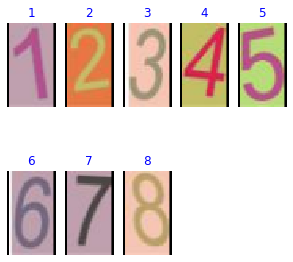

In [21]:
labels_map = {1:"1",2:"2",3:"3",4:"4",5:"5",6:"6",7:"7",8:"8",9:"9"}

predict = model(image_array[0:-1], training=False)
real_label = [i for i in range(1,10)]

fig = plt.figure(figsize=(5, 5))
for i, (pre, label, image) in enumerate(zip(predict, real_label, image_array)):
    p = fig.add_subplot(2, 5, i+1)
    if np.argmax(pre)+1 == label:
        p.set_title("{}".format(labels_map[label]), color='blue')
    else:
        p.set_title("{}/{}".format(labels_map[np.argmax(pre)+1],
                                   labels_map[label]), color='red')
    p.imshow(image/255)
    p.axis('off')

In [22]:
model.save_weights(os.path.join('./trained_model/my_model_bcimoneydigit'))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

tf.Tensor(
[[1.10177520e-04 5.90291992e-03 1.71498954e-07 9.35132673e-04
  1.33927924e-05 7.59293641e-08 2.43884395e-04 9.92794216e-01
  3.30655769e-09]
 [1.06943480e-04 5.81615232e-03 1.61718006e-07 9.31992079e-04
  1.32667965e-05 7.63214345e-08 2.38178574e-04 9.92893159e-01
  3.13362203e-09]
 [1.05670253e-04 5.70322899e-03 1.57061038e-07 8.93775956e-04
  1.39980120e-05 7.62714620e-08 2.37362503e-04 9.93045747e-01
  3.13223891e-09]], shape=(3, 9), dtype=float32)
[8 8 8]


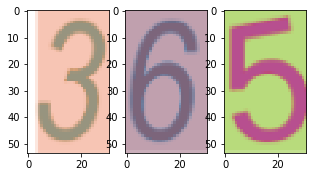

In [23]:
import pyautogui

im = pyautogui.screenshot(region=(1000,278, 105, 54))

all_number = np.array(im)

first_number = all_number[:,0:31]/255.
second_number = all_number[:,37:68]/255.
third_number = all_number[:,71:102]/255.

fig = plt.figure(figsize=(5, 5))
p = fig.add_subplot(1, 3, 1)
p.imshow(first_number)
p = fig.add_subplot(1, 3, 2)
p.imshow(second_number)
p = fig.add_subplot(1, 3, 3)
p.imshow(third_number)

first_number_extension = np.expand_dims(first_number,axis=0)
second_number_extension = np.expand_dims(second_number,axis=0)
third_number_extension = np.expand_dims(third_number,axis=0)

number_array = np.concatenate((first_number_extension,second_number_extension),axis=0)
number_array = np.concatenate((number_array,third_number_extension),axis=0)

result = model(number_array[0:3])

print(result)

print(np.argmax(result,axis=1)+1)